In [1]:
import os
os.chdir('D:\\freelance tasks\\Machine Learning ICA Samyuk Teesside University')

### Dry Bean classification by structural bean attirbutes (7 types of dry beans)
Dataset link: https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
beandf = pd.read_excel('Dry_Bean_Dataset.xlsx')
beandf.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
print('MIssing Values in columns: \n',beandf.isna().sum())

MIssing Values in columns: 
 Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


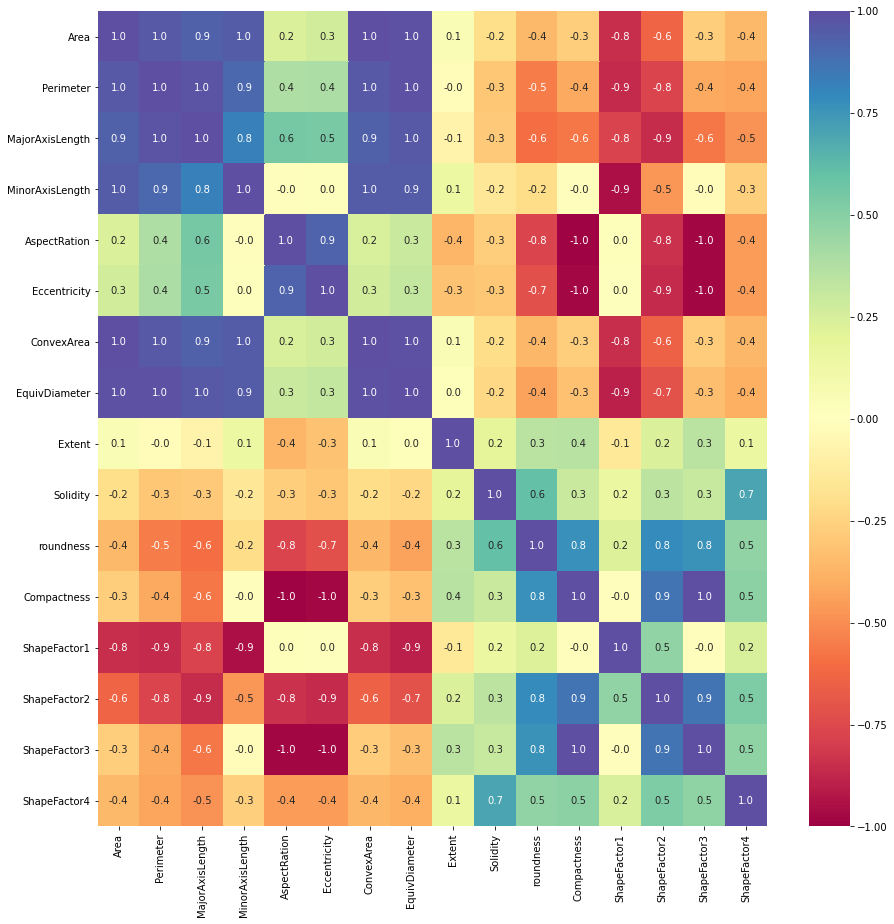

In [19]:
import seaborn as sns
X = beandf.drop(columns = 'Class',axis = 1)
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(),annot = True, fmt='.1f', vmin=-1, vmax=1, center= 0,cmap='Spectral')
plt.show()

In [7]:
beandf.groupby(by='Class').count().reset_index()[['Class','Area']].rename(columns = {'Area':'Count'})

,Class,Count
0,BARBUNYA,1322
1,BOMBAY,522
2,CALI,1630
3,DERMASON,3546
4,HOROZ,1928
5,SEKER,2027
6,SIRA,2636


In [20]:
X = np.array(X)
y = np.array(beandf['Class'])

### Decision tree model fitting

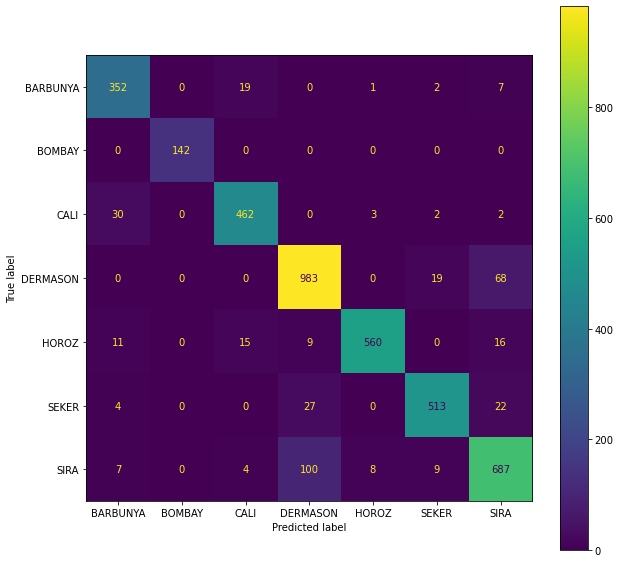

Classification report in test set: 
               precision    recall  f1-score   support

    BARBUNYA       0.87      0.92      0.90       381
      BOMBAY       1.00      1.00      1.00       142
        CALI       0.92      0.93      0.92       499
    DERMASON       0.88      0.92      0.90      1070
       HOROZ       0.98      0.92      0.95       611
       SEKER       0.94      0.91      0.92       566
        SIRA       0.86      0.84      0.85       815

    accuracy                           0.91      4084
   macro avg       0.92      0.92      0.92      4084
weighted avg       0.91      0.91      0.91      4084



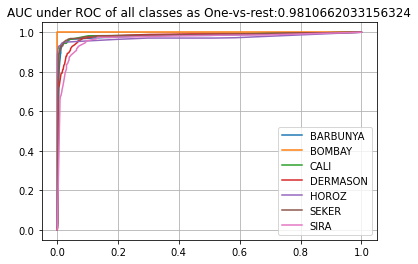

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=201)
tree = DecisionTreeClassifier(random_state=501,ccp_alpha= 1e-4,
                              max_leaf_nodes=120,min_impurity_decrease=1e-4,max_features=10)
tree.fit(X_train,y_train)
ypreds = tree.predict(X_test)
probs = tree.predict_proba(X_test)
fig, axes = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(tree,X_test, y_test,ax=axes)
plt.show()
print('Classification report in test set: \n',classification_report(y_test,ypreds,\
                                                           labels = ['BARBUNYA','BOMBAY','CALI','DERMASON','HOROZ','SEKER',
                                                                    'SIRA']))
fpr, tpr, thresholds = roc_curve(y_test, probs[:,0], pos_label='BARBUNYA')
plt.plot(fpr,tpr)
fpr, tpr, thresholds = roc_curve(y_test, probs[:,1], pos_label='BOMBAY')
plt.plot(fpr,tpr)
fpr, tpr, thresholds = roc_curve(y_test, probs[:,2], pos_label='CALI')
plt.plot(fpr,tpr)
fpr, tpr, thresholds = roc_curve(y_test, probs[:,3], pos_label='DERMASON')
plt.plot(fpr,tpr)
fpr, tpr, thresholds = roc_curve(y_test, probs[:,4], pos_label='HOROZ')
plt.plot(fpr,tpr)
fpr, tpr, thresholds = roc_curve(y_test, probs[:,5], pos_label='SEKER')
plt.plot(fpr,tpr)
fpr, tpr, thresholds = roc_curve(y_test, probs[:,6], pos_label='SIRA')
plt.plot(fpr,tpr)
plt.grid()
plt.title('AUC under ROC of all classes as One-vs-rest:'+str(roc_auc_score(y_test, probs, multi_class='ovr')))
plt.legend(['BARBUNYA','BOMBAY','CALI','DERMASON','HOROZ','SEKER','SIRA'])
plt.show()

### Naive Bayes model fitting

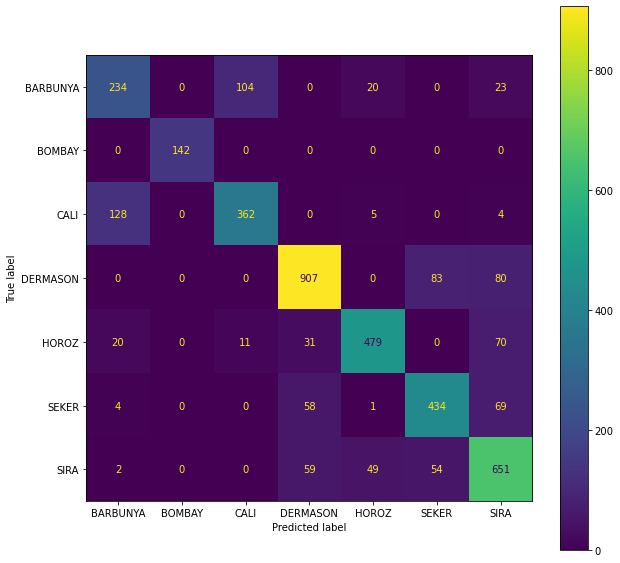

Classification report in test set: 
               precision    recall  f1-score   support

    BARBUNYA       0.60      0.61      0.61       381
      BOMBAY       1.00      1.00      1.00       142
        CALI       0.76      0.73      0.74       499
    DERMASON       0.86      0.85      0.85      1070
       HOROZ       0.86      0.78      0.82       611
       SEKER       0.76      0.77      0.76       566
        SIRA       0.73      0.80      0.76       815

    accuracy                           0.79      4084
   macro avg       0.80      0.79      0.79      4084
weighted avg       0.79      0.79      0.79      4084



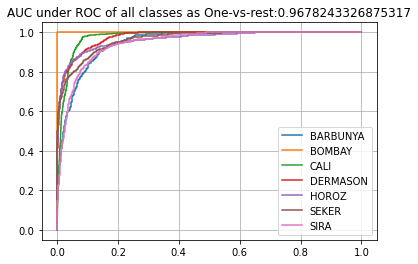

In [29]:
from sklearn.naive_bayes import MultinomialNB
nbmodel = MultinomialNB(alpha=0.5)
nbmodel.fit(X_train,y_train)
ypreds = nbmodel.predict(X_test)
probs = nbmodel.predict_proba(X_test)
fig, axes = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(nbmodel,X_test, y_test,ax=axes)
plt.show()
print('Classification report in test set: \n',classification_report(y_test,ypreds,\
                                                           labels = ['BARBUNYA','BOMBAY','CALI','DERMASON','HOROZ','SEKER',
                                                                    'SIRA']))
fpr, tpr, thresholds = roc_curve(y_test, probs[:,0], pos_label='BARBUNYA')
plt.plot(fpr,tpr)
fpr, tpr, thresholds = roc_curve(y_test, probs[:,1], pos_label='BOMBAY')
plt.plot(fpr,tpr)
fpr, tpr, thresholds = roc_curve(y_test, probs[:,2], pos_label='CALI')
plt.plot(fpr,tpr)
fpr, tpr, thresholds = roc_curve(y_test, probs[:,3], pos_label='DERMASON')
plt.plot(fpr,tpr)
fpr, tpr, thresholds = roc_curve(y_test, probs[:,4], pos_label='HOROZ')
plt.plot(fpr,tpr)
fpr, tpr, thresholds = roc_curve(y_test, probs[:,5], pos_label='SEKER')
plt.plot(fpr,tpr)
fpr, tpr, thresholds = roc_curve(y_test, probs[:,6], pos_label='SIRA')
plt.plot(fpr,tpr)
plt.grid()
plt.title('AUC under ROC of all classes as One-vs-rest:'+str(roc_auc_score(y_test, probs, multi_class='ovr')))
plt.legend(['BARBUNYA','BOMBAY','CALI','DERMASON','HOROZ','SEKER','SIRA'])
plt.show()

### AdaBoost-SAMME Classifier fitting

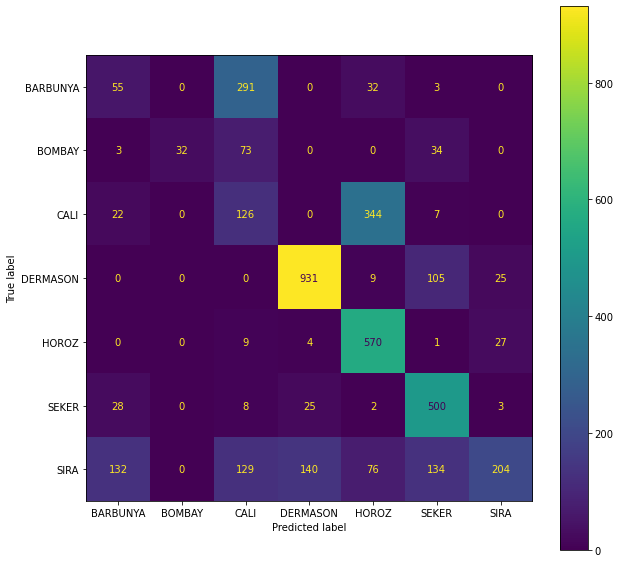

Classification report in test set: 
               precision    recall  f1-score   support

    BARBUNYA       0.23      0.14      0.18       381
      BOMBAY       1.00      0.23      0.37       142
        CALI       0.20      0.25      0.22       499
    DERMASON       0.85      0.87      0.86      1070
       HOROZ       0.55      0.93      0.69       611
       SEKER       0.64      0.88      0.74       566
        SIRA       0.79      0.25      0.38       815

    accuracy                           0.59      4084
   macro avg       0.61      0.51      0.49      4084
weighted avg       0.63      0.59      0.56      4084



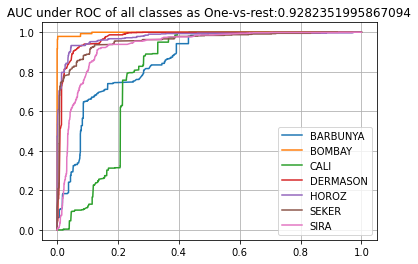

In [50]:
from sklearn.ensemble import AdaBoostClassifier
boostmodel = AdaBoostClassifier(n_estimators=50, random_state=201,learning_rate=7)
boostmodel.fit(X_train,y_train)
ypreds = boostmodel.predict(X_test)
probs = boostmodel.predict_proba(X_test)
fig, axes = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(boostmodel,X_test, y_test,ax=axes)
plt.show()
print('Classification report in test set: \n',classification_report(y_test,ypreds,\
                                                           labels = ['BARBUNYA','BOMBAY','CALI','DERMASON','HOROZ','SEKER',
                                                                    'SIRA']))
fpr, tpr, thresholds = roc_curve(y_test, probs[:,0], pos_label='BARBUNYA')
plt.plot(fpr,tpr)
fpr, tpr, thresholds = roc_curve(y_test, probs[:,1], pos_label='BOMBAY')
plt.plot(fpr,tpr)
fpr, tpr, thresholds = roc_curve(y_test, probs[:,2], pos_label='CALI')
plt.plot(fpr,tpr)
fpr, tpr, thresholds = roc_curve(y_test, probs[:,3], pos_label='DERMASON')
plt.plot(fpr,tpr)
fpr, tpr, thresholds = roc_curve(y_test, probs[:,4], pos_label='HOROZ')
plt.plot(fpr,tpr)
fpr, tpr, thresholds = roc_curve(y_test, probs[:,5], pos_label='SEKER')
plt.plot(fpr,tpr)
fpr, tpr, thresholds = roc_curve(y_test, probs[:,6], pos_label='SIRA')
plt.plot(fpr,tpr)
plt.grid()
plt.title('AUC under ROC of all classes as One-vs-rest:'+str(roc_auc_score(y_test, probs, multi_class='ovr')))
plt.legend(['BARBUNYA','BOMBAY','CALI','DERMASON','HOROZ','SEKER','SIRA'])
plt.show()